In [1]:
import os
import numpy as np
import collections
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
doTrain=False
doLoad=True

In [3]:
os.getcwd()

'/Users/luizaadelinaciucu/Work/ATLAS/TrackML'

In [4]:
def p(name,nparray):
    print(nparray)
    print(name,nparray.shape,type(nparray))
# done function

In [5]:
outputFolder="/Users/luizaadelinaciucu/Work/ATLAS/TrackML/output2"

In [6]:
eventNumber="all"
nparray_InputTrain=np.load(outputFolder+"/NN_2_data_Input_Train_"+eventNumber+".npy")
nparray_InputTest=np.load(outputFolder+"/NN_2_data_Input_Test_"+eventNumber+".npy")
nparray_OutputTrain=np.load(outputFolder+"/NN_2_data_Output_Train_"+eventNumber+".npy")
nparray_OutputTest=np.load(outputFolder+"/NN_2_data_Output_Test_"+eventNumber+".npy")

In [7]:
p("InputTrain",nparray_InputTrain)

[[[-3.23306e+01]
  [-4.28872e+00]
  [-4.62092e+02]
  ...
  [-8.93000e+01]
  [-1.51782e+01]
  [-1.30250e+03]]

 [[-3.04775e+01]
  [-9.58902e+00]
  [-4.21256e+02]
  ...
  [-1.12212e+02]
  [-4.01146e+01]
  [-1.49800e+03]]

 [[-3.19316e+01]
  [-5.42998e+00]
  [-4.84890e+02]
  ...
  [-8.34928e+01]
  [-1.48256e+01]
  [-1.29800e+03]]

 ...

 [[-3.13739e+01]
  [ 2.04705e+00]
  [ 4.87235e+02]
  ...
  [-6.26886e+01]
  [ 6.31295e+00]
  [ 9.57500e+02]]

 [[-3.09550e+01]
  [ 9.47315e+00]
  [ 4.64051e+02]
  ...
  [-4.04887e+01]
  [ 1.09354e+01]
  [ 5.97500e+02]]

 [[-3.31662e+01]
  [-3.98620e-01]
  [ 4.46810e+02]
  ...
  [-7.94153e+01]
  [ 2.56644e-01]
  [ 1.09750e+03]]]
InputTrain (478540, 60, 1) <class 'numpy.ndarray'>


In [8]:
p("InputTest",nparray_InputTest)

[[[  -30.0484 ]
  [  -10.8162 ]
  [ -427.981  ]
  ...
  [  -47.7968 ]
  [  -14.5214 ]
  [ -702.     ]]

 [[  -31.7544 ]
  [   -5.93686]
  [ -455.191  ]
  ...
  [ -102.996  ]
  [  -17.4721 ]
  [-1498.     ]]

 [[  -29.4708 ]
  [  -12.4681 ]
  [ -490.013  ]
  ...
  [  -39.9262 ]
  [  -16.6192 ]
  [ -702.     ]]

 ...

 [[  -31.0072 ]
  [    8.54729]
  [  490.278  ]
  ...
  [  -57.7747 ]
  [   15.953  ]
  [  962.     ]]

 [[  -31.2786 ]
  [    3.73645]
  [  479.993  ]
  ...
  [  -59.8624 ]
  [    7.09361]
  [  957.5    ]]

 [[  -31.2528 ]
  [    4.19333]
  [  450.675  ]
  ...
  [  -67.8425 ]
  [   11.5825 ]
  [  962.     ]]]
InputTest (478540, 60, 1) <class 'numpy.ndarray'>


In [9]:
p ("OutputTrain", nparray_OutputTrain)


[[-1  1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1  1  1 ... -1  1  1]
 ...
 [-1 -1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]]
OutputTrain (478540, 20) <class 'numpy.ndarray'>


In [10]:
p ("OutputTest",nparray_OutputTest)

[[ 1 -1 -1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ...  1 -1 -1]
 ...
 [-1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]]
OutputTest (478540, 20) <class 'numpy.ndarray'>


Acum vom pregati un NN

Create the model

In [11]:
np.random.seed(98383822)
import keras
nrNodesInputLayer=nparray_InputTrain.shape[1] # three inputs (x, y, z) for each hit in the batch
nrNodesOutputLayer=nparray_OutputTrain.shape[1] # one output for each hit in the batch


Using TensorFlow backend.


In [12]:
def get_model_01():
    
    # nr nodes on the hidden layers
    k=2
    nrNodesHiddenLayer=nrNodesOutputLayer*k

    # create empty model
    model=keras.models.Sequential()

    # add first layer 
    model.add(keras.layers.Dense(nrNodesInputLayer,activation='linear',input_shape=(nrNodesInputLayer,1)))

    # flatten first layer
    model.add(keras.layers.Flatten())

    # add hidden layers
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    #model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    #model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))

    # add output layer
    model.add(keras.layers.Dense(nrNodesOutputLayer,activation='tanh'))

    # model geometry done

    # choosing how the NN learns 
    # learning method squared hinge; optimizer Adadelta
    model.compile(loss=keras.losses.hinge,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])

   # now model is done we are ready to train 
    return model
# done function 




In [13]:
def get_model_02():
    
    # nr nodes on the hidden layers
    k=2
    nrNodesHiddenLayer=nrNodesOutputLayer*k

    # create empty model
    model=keras.models.Sequential()

    # add first layer 
    model.add(keras.layers.Dense(nrNodesInputLayer,activation='linear',input_shape=(nrNodesInputLayer,1)))

    # flatten first layer
    model.add(keras.layers.Flatten())

    # add hidden layers
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    #model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    #model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))

    # add output layer
    model.add(keras.layers.Dense(nrNodesOutputLayer,activation='tanh'))

    # model geometry done

    # choosing how the NN learns 
    # learning method squared hinge; optimizer Adadelta
    model.compile(loss=keras.losses.hinge,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])

   # now model is done we are ready to train 
    return model
# done function 


In [14]:
def get_model_03():
    
    # nr nodes on the hidden layers
    k=2
    nrNodesHiddenLayer=nrNodesOutputLayer*k

    # create empty model
    model=keras.models.Sequential()

    # add first layer 
    model.add(keras.layers.Dense(nrNodesInputLayer,activation='linear',input_shape=(nrNodesInputLayer,1)))

    # flatten first layer
    model.add(keras.layers.Flatten())

    # add hidden layers
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    #model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    #model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))

    # add output layer
    model.add(keras.layers.Dense(nrNodesOutputLayer,activation='tanh'))

    # model geometry done

    # choosing how the NN learns 
    # learning method squared hinge; optimizer Adadelta
    model.compile(loss=keras.losses.squared_hinge,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])

   # now model is done we are ready to train 
    return model
# done function 


In [15]:
def get_model_04():
    
    # nr nodes on the hidden layers
    k=2
    nrNodesHiddenLayer=nrNodesOutputLayer*k

    # create empty model
    model=keras.models.Sequential()

    # add first layer 
    model.add(keras.layers.Dense(nrNodesInputLayer,activation='linear',input_shape=(nrNodesInputLayer,1)))

    # flatten first layer
    model.add(keras.layers.Flatten())

    # add hidden layers
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    #model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    #model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))

    # add output layer
    model.add(keras.layers.Dense(nrNodesOutputLayer,activation='tanh'))

    # model geometry done

    # choosing how the NN learns 
    # learning method squared hinge; optimizer Adadelta
    model.compile(loss=keras.losses.squared_hinge,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])

   # now model is done we are ready to train 
    return model
# done function 


In [16]:
def get_model_05():
    
    # nr nodes on the hidden layers
    k=2
    nrNodesHiddenLayer=nrNodesOutputLayer*k

    # create empty model
    model=keras.models.Sequential()

    # add first layer 
    model.add(keras.layers.Dense(nrNodesInputLayer,activation='linear',input_shape=(nrNodesInputLayer,1)))

    # flatten first layer
    model.add(keras.layers.Flatten())

    # add hidden layers
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    #model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    #model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    #model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    #model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))

    # add output layer
    model.add(keras.layers.Dense(nrNodesOutputLayer,activation='tanh'))

    # model geometry done

    # choosing how the NN learns 
    # learning method squared hinge; optimizer Adadelta
    model.compile(loss=keras.losses.hinge,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])

   # now model is done we are ready to train 
    return model
# done function 


In [17]:
def get_model_06():
    
    # nr nodes on the hidden layers
    k=2
    nrNodesHiddenLayer=nrNodesOutputLayer*k

    # create empty model
    model=keras.models.Sequential()

    # add first layer 
    model.add(keras.layers.Dense(nrNodesInputLayer,activation='linear',input_shape=(nrNodesInputLayer,1)))

    # flatten first layer
    model.add(keras.layers.Flatten())

    # add hidden layers
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    #model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    #model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))

    # add output layer
    model.add(keras.layers.Dense(nrNodesOutputLayer,activation='tanh'))

    # model geometry done

    # choosing how the NN learns 
    # learning method squared hinge; optimizer Adadelta
    model.compile(loss=keras.losses.hinge,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])

   # now model is done we are ready to train 
    return model
# done function 


In [18]:
def get_model_07():
    
    # nr nodes on the hidden layers
    k=2
    nrNodesHiddenLayer=nrNodesOutputLayer*k

    # create empty model
    model=keras.models.Sequential()

    # add first layer 
    model.add(keras.layers.Dense(nrNodesInputLayer,activation='linear',input_shape=(nrNodesInputLayer,1)))

    # flatten first layer
    model.add(keras.layers.Flatten())

    # add hidden layers
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    
    # add output layer
    model.add(keras.layers.Dense(nrNodesOutputLayer,activation='tanh'))

    # model geometry done

    # choosing how the NN learns 
    # learning method squared hinge; optimizer Adadelta
    model.compile(loss=keras.losses.squared_hinge,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])

   # now model is done we are ready to train 
    return model
# done function 


In [19]:
def get_model_08():
    
    # nr nodes on the hidden layers
    k=2
    nrNodesHiddenLayer=nrNodesOutputLayer*k

    # create empty model
    model=keras.models.Sequential()

    # add first layer 
    model.add(keras.layers.Dense(nrNodesInputLayer,activation='linear',input_shape=(nrNodesInputLayer,1)))

    # flatten first layer
    model.add(keras.layers.Flatten())

    # add hidden layers
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    #model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    #model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))

    # add output layer
    model.add(keras.layers.Dense(nrNodesOutputLayer,activation='tanh'))

    # model geometry done

    # choosing how the NN learns 
    # learning method squared hinge; optimizer Adadelta
    model.compile(loss=keras.losses.squared_hinge,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])

   # now model is done we are ready to train 
    return model
# done function 


In [20]:
model_01=get_model_01()
model_02=get_model_02()
model_03=get_model_03()
model_04=get_model_04()
model_05=get_model_05()
model_06=get_model_06()
model_07=get_model_07()
model_08=get_model_08()

In [21]:
numberOfEpochs=1000
batchSize=500

In [22]:
def train_model(model,modelName,numberOfEpochs,batchSize):
    print("*** Start train_model for modeName",modelName,"***")
    # train the model and return for each epoch the accuracy and loss values
    # in a variable called history
    history=model.fit(
            nparray_InputTrain,
            nparray_OutputTrain,
            batchSize,numberOfEpochs,
            validation_data=(nparray_InputTest,nparray_OutputTest),
            shuffle=False
            )
    # the train (fit) function outputs a history
    # retrieve from it the accuracy, loss, train, test
    nparray_accuracy_Train=history.history["accuracy"]
    nparray_accuracy_Test=history.history["val_accuracy"]
    nparray_loss_Train=history.history["loss"]
    nparray_loss_Test=history.history["val_loss"]
    
    # save the loss, accuracies, weights + biases of the trained model to a file
    # create the name stem, specific for this training
    outputFileNameStem="NN_3_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    # create the file names for accuracy and loss, train and test
    outputFileNameAccuracyTrain=outputFolder+"/"+outputFileNameStem+"_accuracy_Train.npy"
    outputFileNameAccuracyTest=outputFolder+"/"+outputFileNameStem+"_accuracy_Test.npy"
    outputFileNameLossTrain=outputFolder+"/"+outputFileNameStem+"_loss_Train.npy"
    outputFileNameLossTest=outputFolder+"/"+outputFileNameStem+"_loss_Test.npy"
    # create the file name for the weights and biases
    outputFileNameWeights=outputFolder+"/"+outputFileNameStem+"_weights.hdf5"
    
    # save to files
    #
    np.save(outputFileNameAccuracyTrain,nparray_accuracy_Train)
    np.save(outputFileNameAccuracyTest,nparray_accuracy_Test)
    np.save(outputFileNameLossTrain,nparray_loss_Train)
    np.save(outputFileNameLossTest,nparray_loss_Test)
    #
    model.save_weights(outputFileNameWeights)

    # ready to return
    return (model,nparray_accuracy_Train,nparray_accuracy_Test,nparray_loss_Train,nparray_loss_Test)
# done function

def load_model(model,modelName,numberOfEpochs,batchSize):
    print("*** Start load_model for modeName",modelName,"***")
    # load the loss, accuracies, weights + biases of the trained model to a file
    
    # create the name stem, specific for this training
    outputFileNameStem="NN_3_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)
    # create the file names for accuracy and loss, train and test
    outputFileNameAccuracyTrain=outputFolder+"/"+outputFileNameStem+"_accuracy_Train.npy"
    outputFileNameAccuracyTest=outputFolder+"/"+outputFileNameStem+"_accuracy_Test.npy"
    outputFileNameLossTrain=outputFolder+"/"+outputFileNameStem+"_loss_Train.npy"
    outputFileNameLossTest=outputFolder+"/"+outputFileNameStem+"_loss_Test.npy"
    # create the file name for the weights and biases
    outputFileNameWeights=outputFolder+"/"+outputFileNameStem+"_weights.hdf5"
    
    # retrieve from it the accuracy, loss, train, test
    nparray_accuracy_Train=np.load(outputFileNameAccuracyTrain)
    nparray_accuracy_Test=np.load(outputFileNameAccuracyTest)
    nparray_loss_Train=np.load(outputFileNameLossTrain)
    nparray_loss_Test=np.load(outputFileNameLossTest)
    
    # load the weights and biases
    model.load_weights(outputFileNameWeights)

    # ready to return
    return (model,nparray_accuracy_Train,nparray_accuracy_Test,nparray_loss_Train,nparray_loss_Test)
# done function

In [23]:
if doTrain:
    model_01,nparray_accuracy_Train_01,nparray_accuracy_Test_01,nparray_loss_Train_01,nparray_loss_Test_01=train_model(model_01,"Model_01",numberOfEpochs=numberOfEpochs,batchSize=batchSize)
    model_02,nparray_accuracy_Train_02,nparray_accuracy_Test_02,nparray_loss_Train_02,nparray_loss_Test_02=train_model(model_02,"Model_02",numberOfEpochs=1,batchSize=batchSize)
    model_03,nparray_accuracy_Train_03,nparray_accuracy_Test_03,nparray_loss_Train_03,nparray_loss_Test_03=train_model(model_03,"Model_03",numberOfEpochs=1,batchSize=batchSize)
    model_04,nparray_accuracy_Train_04,nparray_accuracy_Test_04,nparray_loss_Train_04,nparray_loss_Test_04=train_model(model_04,"Model_04",numberOfEpochs=1,batchSize=batchSize)
    model_05,nparray_accuracy_Train_05,nparray_accuracy_Test_05,nparray_loss_Train_05,nparray_loss_Test_05=train_model(model_05,"Model_05",numberOfEpochs=1,batchSize=batchSize)
    model_06,nparray_accuracy_Train_06,nparray_accuracy_Test_06,nparray_loss_Train_06,nparray_loss_Test_06=train_model(model_06,"Model_06",numberOfEpochs=1,batchSize=batchSize)
    model_07,nparray_accuracy_Train_07,nparray_accuracy_Test_07,nparray_loss_Train_07,nparray_loss_Test_07=train_model(model_07,"Model_07",numberOfEpochs=1,batchSize=batchSize)
    model_08,nparray_accuracy_Train_08,nparray_accuracy_Test_08,nparray_loss_Train_08,nparray_loss_Test_08=train_model(model_08,"Model_08",numberOfEpochs=1,batchSize=batchSize)
if doLoad:
    model_01,nparray_accuracy_Train_01,nparray_accuracy_Test_01,nparray_loss_Train_01,nparray_loss_Test_01=load_model(model_01,"Model_01",numberOfEpochs=numberOfEpochs,batchSize=batchSize)
    model_02,nparray_accuracy_Train_02,nparray_accuracy_Test_02,nparray_loss_Train_02,nparray_loss_Test_02=load_model(model_02,"Model_02",numberOfEpochs=numberOfEpochs,batchSize=batchSize)
    model_03,nparray_accuracy_Train_03,nparray_accuracy_Test_03,nparray_loss_Train_03,nparray_loss_Test_03=load_model(model_03,"Model_03",numberOfEpochs=numberOfEpochs,batchSize=batchSize)
    model_04,nparray_accuracy_Train_04,nparray_accuracy_Test_04,nparray_loss_Train_04,nparray_loss_Test_04=load_model(model_04,"Model_04",numberOfEpochs=numberOfEpochs,batchSize=batchSize)
    model_05,nparray_accuracy_Train_05,nparray_accuracy_Test_05,nparray_loss_Train_05,nparray_loss_Test_05=load_model(model_05,"Model_05",numberOfEpochs=numberOfEpochs,batchSize=batchSize)
    model_06,nparray_accuracy_Train_06,nparray_accuracy_Test_06,nparray_loss_Train_06,nparray_loss_Test_06=load_model(model_06,"Model_06",numberOfEpochs=numberOfEpochs,batchSize=batchSize)
    model_07,nparray_accuracy_Train_07,nparray_accuracy_Test_07,nparray_loss_Train_07,nparray_loss_Test_07=load_model(model_07,"Model_07",numberOfEpochs=numberOfEpochs,batchSize=batchSize)
    model_08,nparray_accuracy_Train_08,nparray_accuracy_Test_08,nparray_loss_Train_08,nparray_loss_Test_08=load_model(model_08,"Model_08",numberOfEpochs=numberOfEpochs,batchSize=batchSize)

*** Start load_model for modeName Model_01 ***
*** Start load_model for modeName Model_02 ***
*** Start load_model for modeName Model_03 ***
*** Start load_model for modeName Model_04 ***
*** Start load_model for modeName Model_05 ***
*** Start load_model for modeName Model_06 ***
*** Start load_model for modeName Model_07 ***
*** Start load_model for modeName Model_08 ***


In [24]:
from collections import Counter 
def predict_from_model(model,nparray_Input,nparray_Output):
    nparray_PredictedOutput=model.predict(nparray_Input)
    p("PredictedOutput",nparray_PredictedOutput)
    p("Output",nparray_Output)
    nparray_Diff=nparray_PredictedOutput-nparray_Output
    p("Diff",nparray_Diff)
    counter=0
    for line in nparray_Diff:
        #print("line",line)
        for el in line:
            #print("el",el)
            if el==0:
                counter+=1
    print("counter",counter)
    nrEl=nparray_Diff.shape[0]*nparray_Diff.shape[1]
    print("nrEl",nrEl)
    ratio1=counter/nrEl
    print("ratio1",ratio1)
    np.count_nonzero(nparray_Diff)
    ratio2=1-np.count_nonzero(nparray_Diff)/nrEl
    print("ratio2",ratio2)
    list_counterLine=[]
    for line in nparray_Diff:
        counterLine=0
        for el in line:
            if el==0:
                counterLine+=1
        # print("counterLine",counterLine)
        list_counterLine.append(counterLine) 
    #print("list_counterLine",list_counterLine,len(list_counterLine))
    counter=Counter(list_counterLine)
    print("counter",counter)
    for el in sorted(counter.keys()):
        print("el",el,"counter",counter[el])
    nparray_counterLine=np.array(list_counterLine)
    p("counterLine",nparray_counterLine)
    # done all ready to return
    return (ratio2,nparray_counterLine)
# done function

In [25]:
(ratio_01_Train,nparray_counterLine_01_Train)=predict_from_model(model_01,nparray_InputTrain,nparray_OutputTrain)
(ratio_02_Train,nparray_counterLine_02_Train)=predict_from_model(model_02,nparray_InputTrain,nparray_OutputTrain)
(ratio_03_Train,nparray_counterLine_03_Train)=predict_from_model(model_03,nparray_InputTrain,nparray_OutputTrain)
(ratio_04_Train,nparray_counterLine_04_Train)=predict_from_model(model_04,nparray_InputTrain,nparray_OutputTrain)
(ratio_05_Train,nparray_counterLine_05_Train)=predict_from_model(model_05,nparray_InputTrain,nparray_OutputTrain)
(ratio_06_Train,nparray_counterLine_06_Train)=predict_from_model(model_06,nparray_InputTrain,nparray_OutputTrain)
(ratio_07_Train,nparray_counterLine_07_Train)=predict_from_model(model_07,nparray_InputTrain,nparray_OutputTrain)
(ratio_08_Train,nparray_counterLine_08_Train)=predict_from_model(model_08,nparray_InputTrain,nparray_OutputTrain)

[[-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [-1. -1.  1. ... -1. -1. -1.]
 [-1. -1.  1. ... -1. -1. -1.]
 [-1. -1.  1. ... -1. -1. -1.]]
PredictedOutput (478540, 20) <class 'numpy.ndarray'>
[[-1  1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1  1  1 ... -1  1  1]
 ...
 [-1 -1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]]
Output (478540, 20) <class 'numpy.ndarray'>
[[ 0. -2.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0. -2. -2. ...  0. -2. -2.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [-2. -2.  0. ...  0.  0.  0.]
 [-2. -2.  0. ...  0.  0.  0.]]
Diff (478540, 20) <class 'numpy.ndarray'>
counter 6404172
nrEl 9570800
ratio1 0.6691365403101099
ratio2 0.6691365403101099
counter Counter({15: 70712, 14: 68309, 16: 58478, 13: 57989, 12: 46659, 17: 37752, 11: 36018, 10: 27053, 9: 19481, 18: 17294, 8: 13800, 7: 9004, 6: 5516, 19: 5353, 5: 2808, 4: 1137, 20: 728, 3: 364, 2: 68, 1: 13, 0: 4})
el 0 counter 4
el 1 

[[-1. -1. -1. ... -1. -1. -1.]
 [-1. -1.  1. ... -1. -1. -1.]
 [-1. -1.  1. ... -1. -1. -1.]
 ...
 [-1. -1.  1. ... -1. -1. -1.]
 [-1. -1.  1. ... -1. -1. -1.]
 [-1. -1.  1. ... -1. -1. -1.]]
PredictedOutput (478540, 20) <class 'numpy.ndarray'>
[[-1  1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1  1  1 ... -1  1  1]
 ...
 [-1 -1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]]
Output (478540, 20) <class 'numpy.ndarray'>
[[ 0. -2.  0. ...  0.  0.  0.]
 [ 0.  0.  2. ...  0.  0.  0.]
 [ 0. -2.  0. ...  0. -2. -2.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [-2. -2.  0. ...  0.  0.  0.]
 [-2. -2.  0. ...  0.  0.  0.]]
Diff (478540, 20) <class 'numpy.ndarray'>
counter 6475098
nrEl 9570800
ratio1 0.6765472060851757
ratio2 0.6765472060851758
counter Counter({15: 65498, 16: 61404, 14: 61119, 13: 53228, 12: 45621, 17: 44008, 11: 35992, 10: 26845, 18: 23820, 9: 19037, 8: 13098, 7: 8461, 19: 8072, 6: 5385, 5: 3015, 4: 1543, 20: 1451, 3: 689, 2: 220, 1: 28, 0: 6})
el 0 counter 6
el 

In [26]:
(ratio_01_Test,nparray_counterLine_01_Test)=predict_from_model(model_01,nparray_InputTest,nparray_OutputTest)
(ratio_02_Test,nparray_counterLine_02_Test)=predict_from_model(model_02,nparray_InputTest,nparray_OutputTest)
(ratio_03_Test,nparray_counterLine_03_Test)=predict_from_model(model_03,nparray_InputTest,nparray_OutputTest)
(ratio_04_Test,nparray_counterLine_04_Test)=predict_from_model(model_04,nparray_InputTest,nparray_OutputTest)
(ratio_05_Test,nparray_counterLine_05_Test)=predict_from_model(model_05,nparray_InputTest,nparray_OutputTest)
(ratio_06_Test,nparray_counterLine_06_Test)=predict_from_model(model_06,nparray_InputTest,nparray_OutputTest)
(ratio_07_Test,nparray_counterLine_07_Test)=predict_from_model(model_07,nparray_InputTest,nparray_OutputTest)
(ratio_08_Test,nparray_counterLine_08_Test)=predict_from_model(model_08,nparray_InputTest,nparray_OutputTest)

[[-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [-1.  1.  1. ... -1. -1. -1.]
 [-1. -1.  1. ... -1. -1. -1.]
 [-1. -1.  1. ... -1. -1. -1.]]
PredictedOutput (478540, 20) <class 'numpy.ndarray'>
[[ 1 -1 -1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ...  1 -1 -1]
 ...
 [-1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]]
Output (478540, 20) <class 'numpy.ndarray'>
[[-2.  0.  0. ...  0.  0.  0.]
 [-2. -2. -2. ...  0.  0.  0.]
 [-2. -2. -2. ... -2.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [-2. -2.  0. ...  0.  0.  0.]
 [-2. -2.  0. ...  0.  0.  0.]]
Diff (478540, 20) <class 'numpy.ndarray'>
counter 6406997
nrEl 9570800
ratio1 0.6694317089480504
ratio2 0.6694317089480504
counter Counter({15: 70435, 14: 68155, 16: 58539, 13: 58047, 12: 46798, 17: 38223, 11: 35863, 10: 26487, 9: 19945, 18: 17387, 8: 13784, 7: 9002, 6: 5443, 19: 5310, 5: 2874, 4: 1084, 20: 761, 3: 314, 2: 76, 1: 12, 0: 1})
el 0 counter 1
el 1 

[[-1. -1.  1. ... -1. -1. -1.]
 [-1. -1.  1. ... -1. -1. -1.]
 [-1. -1.  1. ... -1. -1. -1.]
 ...
 [-1. -1.  1. ... -1. -1. -1.]
 [-1. -1.  1. ... -1. -1. -1.]
 [-1. -1.  1. ... -1. -1. -1.]]
PredictedOutput (478540, 20) <class 'numpy.ndarray'>
[[ 1 -1 -1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ...  1 -1 -1]
 ...
 [-1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]]
Output (478540, 20) <class 'numpy.ndarray'>
[[-2.  0.  2. ...  0.  0.  0.]
 [-2. -2.  0. ...  0.  0.  0.]
 [-2. -2.  0. ... -2.  0.  0.]
 ...
 [ 0. -2.  0. ...  0.  0.  0.]
 [-2. -2.  0. ...  0.  0.  0.]
 [-2. -2.  0. ...  0.  0.  0.]]
Diff (478540, 20) <class 'numpy.ndarray'>
counter 6476284
nrEl 9570800
ratio1 0.6766711246708739
ratio2 0.6766711246708739
counter Counter({15: 65567, 14: 61650, 16: 61038, 13: 53394, 12: 45497, 17: 43905, 11: 35720, 10: 27107, 18: 23829, 9: 19026, 8: 12908, 7: 8582, 19: 8171, 6: 5240, 5: 2975, 4: 1560, 20: 1440, 3: 683, 2: 220, 1: 23, 0: 5})
el 0 counter 5
el 

In [27]:
print("ratio_01_Train",ratio_01_Train)
print("ratio_02_Train",ratio_02_Train)
print("ratio_03_Train",ratio_03_Train)
print("ratio_04_Train",ratio_04_Train)
print("ratio_05_Train",ratio_05_Train)
print("ratio_06_Train",ratio_06_Train)
print("ratio_07_Train",ratio_07_Train)
print("ratio_08_Train",ratio_08_Train)

ratio_01_Train 0.6691365403101099
ratio_02_Train 0.6643455092573244
ratio_03_Train 0.6660591591089564
ratio_04_Train 0.6699776403226481
ratio_05_Train 0.673872612529778
ratio_06_Train 0.6285100514063611
ratio_07_Train 0.6765472060851758
ratio_08_Train 0.6596143478079157


In [28]:
print("ratio_01_Test",ratio_01_Test)
print("ratio_02_Test",ratio_02_Test)
print("ratio_03_Test",ratio_03_Test)
print("ratio_04_Test",ratio_04_Test)
print("ratio_05_Test",ratio_05_Test)
print("ratio_06_Test",ratio_06_Test)
print("ratio_07_Test",ratio_07_Test)
print("ratio_08_Test",ratio_08_Test)

ratio_01_Test 0.6694317089480504
ratio_02_Test 0.6645324319806076
ratio_03_Test 0.6662458728632925
ratio_04_Test 0.6699937309315835
ratio_05_Test 0.6738688510887283
ratio_06_Test 0.6287018848999039
ratio_07_Test 0.6766711246708739
ratio_08_Test 0.6598879926442931


In [29]:
p("nparray_counterLine_01_Train",nparray_counterLine_01_Train)
p("nparray_counterLine_02_Train",nparray_counterLine_02_Train)
p("nparray_counterLine_03_Train",nparray_counterLine_03_Train)
p("nparray_counterLine_04_Train",nparray_counterLine_04_Train)
p("nparray_counterLine_05_Train",nparray_counterLine_05_Train)
p("nparray_counterLine_06_Train",nparray_counterLine_06_Train)
p("nparray_counterLine_07_Train",nparray_counterLine_07_Train)
p("nparray_counterLine_08_Train",nparray_counterLine_08_Train)

[12 14 12 ... 16 10  9]
nparray_counterLine_01_Train (478540,) <class 'numpy.ndarray'>
[13 16  9 ... 18  9 10]
nparray_counterLine_02_Train (478540,) <class 'numpy.ndarray'>
[13 12  9 ... 15  9 10]
nparray_counterLine_03_Train (478540,) <class 'numpy.ndarray'>
[12 13 13 ... 20  8 14]
nparray_counterLine_04_Train (478540,) <class 'numpy.ndarray'>
[15 13 10 ... 15  8 11]
nparray_counterLine_05_Train (478540,) <class 'numpy.ndarray'>
[10 13 12 ... 15  8 12]
nparray_counterLine_06_Train (478540,) <class 'numpy.ndarray'>
[11 12 13 ... 16  8  9]
nparray_counterLine_07_Train (478540,) <class 'numpy.ndarray'>
[15 12 14 ... 15 10 12]
nparray_counterLine_08_Train (478540,) <class 'numpy.ndarray'>


In [30]:
p("nparray_counterLine_01_Test",nparray_counterLine_01_Test)
p("nparray_counterLine_02_Test",nparray_counterLine_02_Test)
p("nparray_counterLine_03_Test",nparray_counterLine_03_Test)
p("nparray_counterLine_04_Test",nparray_counterLine_04_Test)
p("nparray_counterLine_05_Test",nparray_counterLine_05_Test)
p("nparray_counterLine_06_Test",nparray_counterLine_06_Test)
p("nparray_counterLine_07_Test",nparray_counterLine_07_Test)
p("nparray_counterLine_08_Test",nparray_counterLine_08_Test)

[16 12  9 ... 14 14 15]
nparray_counterLine_01_Test (478540,) <class 'numpy.ndarray'>
[12 10 10 ... 11 14 14]
nparray_counterLine_02_Test (478540,) <class 'numpy.ndarray'>
[12 11 10 ... 14 12 12]
nparray_counterLine_03_Test (478540,) <class 'numpy.ndarray'>
[13 11  9 ... 12 15 15]
nparray_counterLine_04_Test (478540,) <class 'numpy.ndarray'>
[14 10 10 ... 11 12 13]
nparray_counterLine_05_Test (478540,) <class 'numpy.ndarray'>
[11  9  7 ... 10 11 12]
nparray_counterLine_06_Test (478540,) <class 'numpy.ndarray'>
[13 12  9 ... 13 16 16]
nparray_counterLine_07_Test (478540,) <class 'numpy.ndarray'>
[13 11  8 ... 12 14 14]
nparray_counterLine_08_Test (478540,) <class 'numpy.ndarray'>


In [31]:
# overlay accuracy train and test
def plot_accuracy_Train_vs_Test(nparray_accuracy_Train,nparray_accuracy_Test,modelName):
    plt.plot(nparray_accuracy_Train)
    plt.plot(nparray_accuracy_Test)
    plt.title('Model_'+modelName+' accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.ylim(bottom=0,top=0.5)
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
# done function

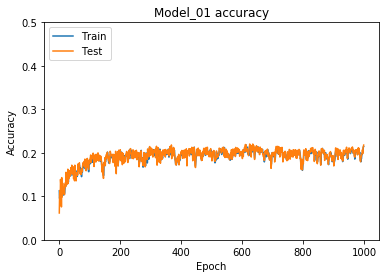

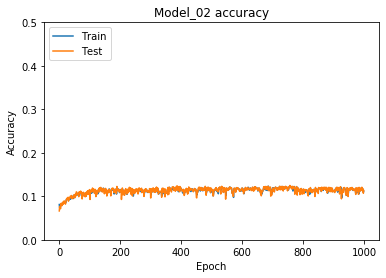

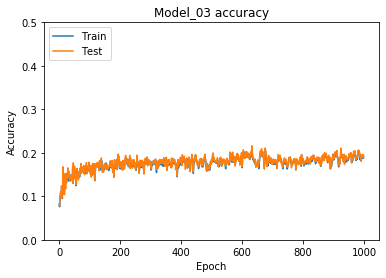

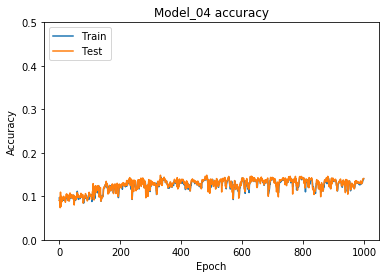

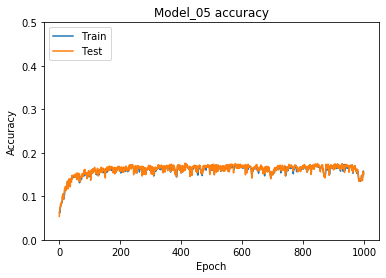

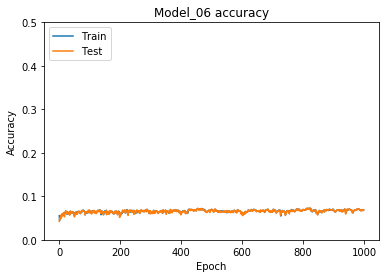

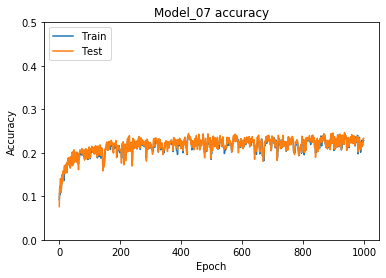

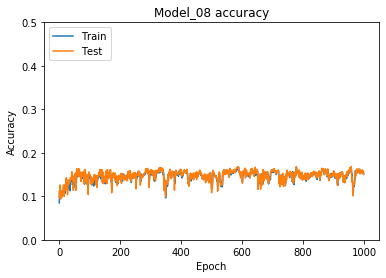

In [32]:
plot_accuracy_Train_vs_Test(nparray_accuracy_Train_01,nparray_accuracy_Test_01,"01")
plot_accuracy_Train_vs_Test(nparray_accuracy_Train_02,nparray_accuracy_Test_02,"02")
plot_accuracy_Train_vs_Test(nparray_accuracy_Train_03,nparray_accuracy_Test_03,"03")
plot_accuracy_Train_vs_Test(nparray_accuracy_Train_04,nparray_accuracy_Test_04,"04")
plot_accuracy_Train_vs_Test(nparray_accuracy_Train_05,nparray_accuracy_Test_05,"05")
plot_accuracy_Train_vs_Test(nparray_accuracy_Train_06,nparray_accuracy_Test_06,"06")
plot_accuracy_Train_vs_Test(nparray_accuracy_Train_07,nparray_accuracy_Test_07,"07")
plot_accuracy_Train_vs_Test(nparray_accuracy_Train_08,nparray_accuracy_Test_08,"08")

In [33]:
# overlay loss train and test
def plot_loss_Train_vs_Test(nparray_loss_Train,nparray_loss_Test,modelName):
    plt.plot(nparray_loss_Train)
    plt.plot(nparray_loss_Test)
    plt.title('Model_'+modelName+' loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Test'],loc="upper left")
    plt.show()
# done function

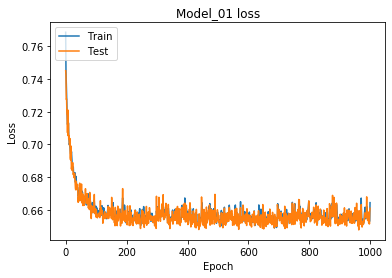

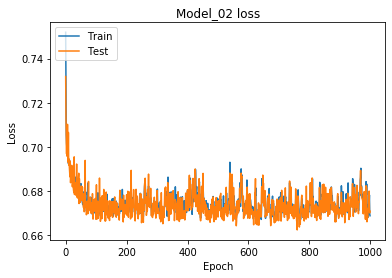

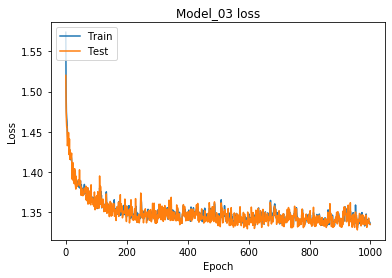

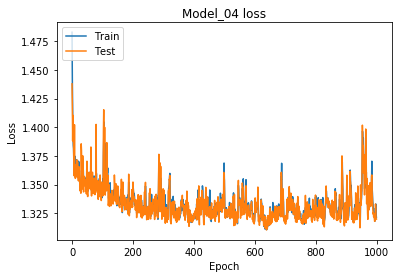

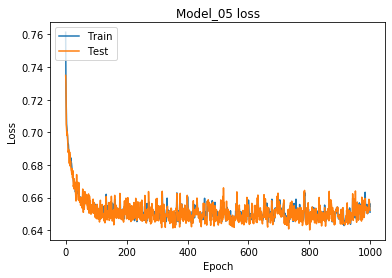

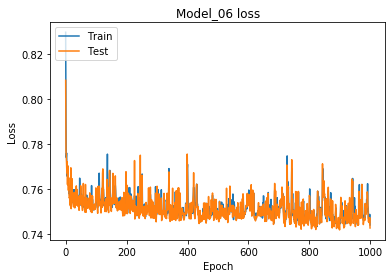

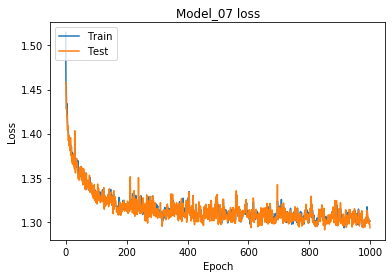

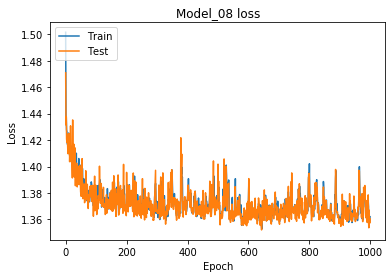

In [34]:
plot_loss_Train_vs_Test(nparray_loss_Train_01,nparray_loss_Test_01,"01")
plot_loss_Train_vs_Test(nparray_loss_Train_02,nparray_loss_Test_02,"02")
plot_loss_Train_vs_Test(nparray_loss_Train_03,nparray_loss_Test_03,"03")
plot_loss_Train_vs_Test(nparray_loss_Train_04,nparray_loss_Test_04,"04")
plot_loss_Train_vs_Test(nparray_loss_Train_05,nparray_loss_Test_05,"05")
plot_loss_Train_vs_Test(nparray_loss_Train_06,nparray_loss_Test_06,"06")
plot_loss_Train_vs_Test(nparray_loss_Train_07,nparray_loss_Test_07,"07")
plot_loss_Train_vs_Test(nparray_loss_Train_08,nparray_loss_Test_08,"08")

In [35]:
# overlay train and test we expect train to be better than test 
def plot_train_test(nparray_counterLineTrain,nparray_counterLineTest,modelName):
    plt.hist(nparray_counterLineTrain,bins=range(0,22),alpha=1,color="blue",histtype='step')
    plt.hist(nparray_counterLineTest,bins=range(0,22),alpha=1,color="red",histtype='step')
    plt.ylabel('Nr of buckets')
    plt.xlabel('Nr of hits corectly predicted')
    plt.title('Model_'+modelName)
    plt.legend(["Train","Test"],loc='upper left')
    #plt.ylim(bottom=0,top=250)
    plt.show()
# done function

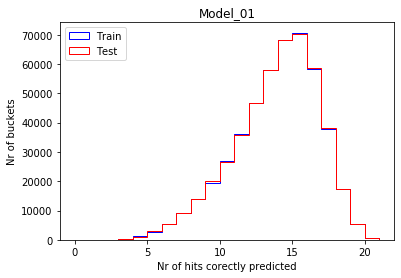

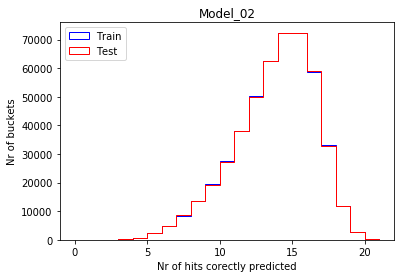

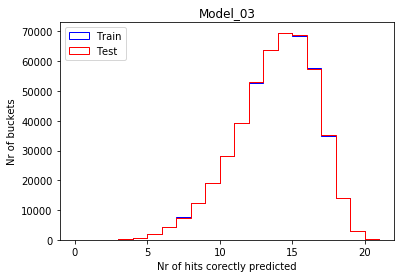

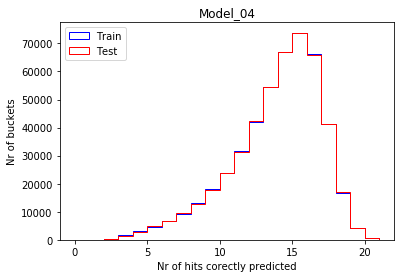

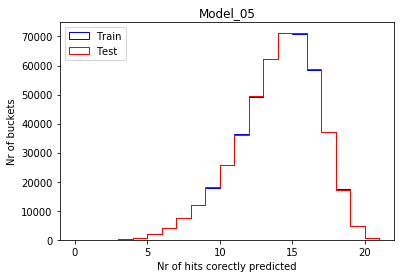

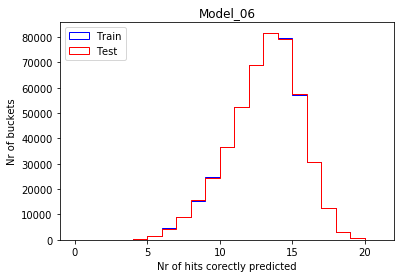

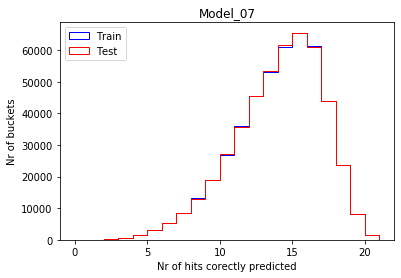

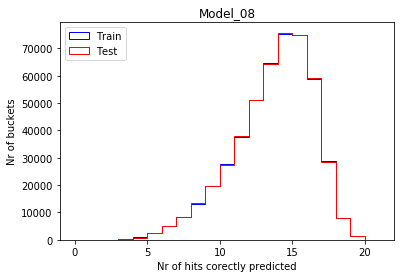

In [36]:
plot_train_test(nparray_counterLine_01_Train,nparray_counterLine_01_Test,"01")
plot_train_test(nparray_counterLine_02_Train,nparray_counterLine_02_Test,"02")
plot_train_test(nparray_counterLine_03_Train,nparray_counterLine_03_Test,"03")
plot_train_test(nparray_counterLine_04_Train,nparray_counterLine_04_Test,"04")
plot_train_test(nparray_counterLine_05_Train,nparray_counterLine_05_Test,"05")
plot_train_test(nparray_counterLine_06_Train,nparray_counterLine_06_Test,"06")
plot_train_test(nparray_counterLine_07_Train,nparray_counterLine_07_Test,"07")
plot_train_test(nparray_counterLine_08_Train,nparray_counterLine_08_Test,"08")


In [37]:
# Overlay several models for accuracy train
def plot_accuracy_train_several_models():
    plt.plot(nparray_accuracy_Train_01)
    plt.plot(nparray_accuracy_Train_02)
    plt.plot(nparray_accuracy_Train_03)
    plt.plot(nparray_accuracy_Train_04)
    plt.plot(nparray_accuracy_Train_05)
    plt.plot(nparray_accuracy_Train_06)
    plt.plot(nparray_accuracy_Train_07)
    plt.plot(nparray_accuracy_Train_08)
    plt.title('accuracy Train')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Model_01',"Model_02","Model_03","Model_04","Model_05","Model_06","Model_07","Model_08"], loc='best')
    plt.ylim(bottom=0)
    plt.show()
    
# done function

# Overlay several models for accuracy test
def plot_accuracy_test_several_models():
    plt.plot(nparray_accuracy_Test_01)
    plt.plot(nparray_accuracy_Test_02)
    plt.plot(nparray_accuracy_Test_03)
    plt.plot(nparray_accuracy_Test_04)
    plt.plot(nparray_accuracy_Test_05)
    plt.plot(nparray_accuracy_Test_06)
    plt.plot(nparray_accuracy_Test_07)
    plt.plot(nparray_accuracy_Test_08)
    plt.title('accuracy Test')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Model_01',"Model_02","Model_03","Model_04","Model_05","Model_06","Model_07","Model_08"], loc='best')
    plt.ylim(bottom=0)
    plt.show()

# done function 

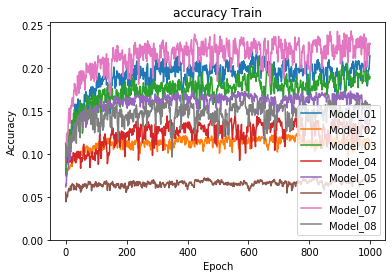

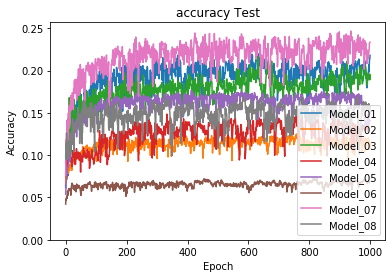

In [38]:
plot_accuracy_train_several_models()
plot_accuracy_test_several_models()

In [72]:
# Overlay several models for loss train
def plot_loss_train_several_models():
    plt.plot(nparray_loss_Train_01)
    plt.plot(nparray_loss_Train_02)
    plt.plot(nparray_loss_Train_03)
    plt.plot(nparray_loss_Train_04)
    plt.plot(nparray_loss_Train_05)
    plt.plot(nparray_loss_Train_06)
    plt.plot(nparray_loss_Train_07)
    plt.plot(nparray_loss_Train_08)
    plt.title('loss Train')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Model_01',"Model_02","Model_03","Model_04","Model_05","Model_06","Model_07","Model_08"], loc='best')
    plt.ylim(bottom=0,top=1.6)
    plt.show()
    
# done function

# Overlay several models for accuracy test
def plot_loss_test_several_models():
    plt.plot(nparray_loss_Test_01)
    plt.plot(nparray_loss_Test_02)
    plt.plot(nparray_loss_Test_03)
    plt.plot(nparray_loss_Test_04)
    plt.plot(nparray_loss_Test_05)
    plt.plot(nparray_loss_Test_06)
    plt.plot(nparray_loss_Test_07)
    plt.plot(nparray_loss_Test_08)
    plt.title('loss Test')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Model_01',"Model_02","Model_03","Model_04","Model_05","Model_06","Model_07","Model_08"], loc='best')
    plt.ylim(bottom=0,top=1.6)
    plt.show()

# done function 

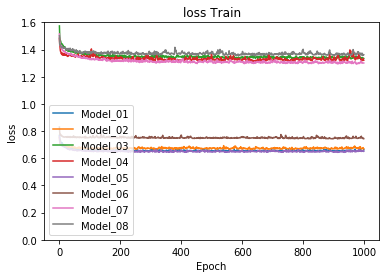

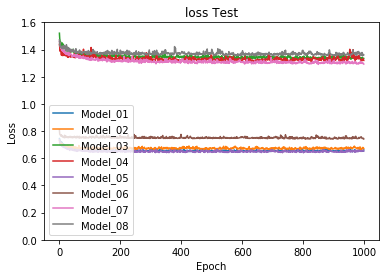

In [73]:
plot_loss_train_several_models()
plot_loss_test_several_models()

In [41]:
def plot_correctly_predicted_Train():
    plt.hist(nparray_counterLine_01_Train,bins=range(0,22),alpha=1,color="blue",histtype='step')
    plt.hist(nparray_counterLine_02_Train,bins=range(0,22),alpha=1,color="red",histtype='step')
    plt.hist(nparray_counterLine_03_Train,bins=range(0,22),alpha=1,color="green",histtype='step')
    plt.hist(nparray_counterLine_04_Train,bins=range(0,22),alpha=1,color="magenta",histtype='step')
    plt.hist(nparray_counterLine_05_Train,bins=range(0,22),alpha=1,color="black",histtype='step')
    plt.hist(nparray_counterLine_06_Train,bins=range(0,22),alpha=1,color="aqua",histtype='step')
    plt.hist(nparray_counterLine_07_Train,bins=range(0,22),alpha=1,color="purple",histtype='step')
    plt.hist(nparray_counterLine_08_Train,bins=range(0,22),alpha=1,color="peru",histtype='step')
    plt.ylabel('Nr of buckets')
    plt.xlabel('Nr of hits corectly predicted')
    plt.title('Train')
    plt.legend(["Model_01","Model_02","Model_03","Model_04","Model_05","Model_06","Model_07","Model_08"],
               loc='upper left')
    #plt.ylim(bottom=0,top=100)
    plt.show()
# done function

# overlay several models for correctly predicted 
def plot_correctly_predicted_Test():
    plt.hist(nparray_counterLine_01_Test,bins=range(0,22),alpha=1,color="blue",histtype='step')
    plt.hist(nparray_counterLine_02_Test,bins=range(0,22),alpha=1,color="red",histtype='step')
    plt.hist(nparray_counterLine_03_Test,bins=range(0,22),alpha=1,color="green",histtype='step')
    plt.hist(nparray_counterLine_04_Test,bins=range(0,22),alpha=1,color="magenta",histtype='step')
    plt.hist(nparray_counterLine_05_Test,bins=range(0,22),alpha=1,color="black",histtype='step')
    plt.hist(nparray_counterLine_06_Test,bins=range(0,22),alpha=1,color="aqua",histtype='step')
    plt.hist(nparray_counterLine_07_Test,bins=range(0,22),alpha=1,color="purple",histtype='step')
    plt.hist(nparray_counterLine_08_Test,bins=range(0,22),alpha=1,color="peru",histtype='step')
    plt.ylabel('Nr of buckets')
    plt.xlabel('Nr of hits corectly predicted')
    plt.title('Test')
    #plt.legend(["Model_01","Model_02","Model_03","Model_04"],loc='upper left')
    plt.legend(["Model_01","Model_02","Model_03","Model_04","Model_05","Model_06","Model_07","Model_08"],
               loc='upper left')
    #plt.ylim(bottom=0,top=100)
    plt.show()
# done function

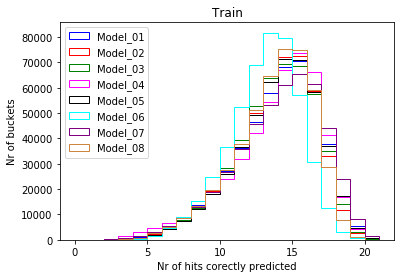

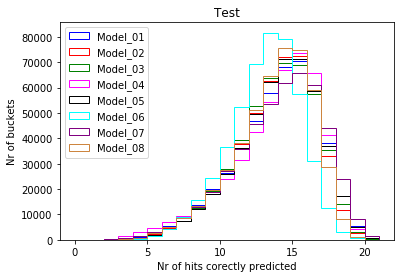

In [42]:
plot_correctly_predicted_Train()
plot_correctly_predicted_Test()

In [43]:
# overlay several models for correctly predicted 
def plot_overlay_hist(
        list_tupleArray,
        x_info=["My variable",(-1,-1)],
        y_info=["My count",(-1,-1)],
        title_info=["My title"],
        legend_info=["best"],
        debug=False
    ):
    nrEl=len(list_tupleArray)
    if debug:
        print("nrEl",nrEl)
    list_legend=[]
    for i in range(len(list_tupleArray)):
        tupleArray=list_tupleArray[i]
        if debug:
            print("i",i,"tupleArray",tupleArray,type(tupleArray),len(tupleArray))
        nparray=tupleArray[0]
        legend=tupleArray[1]
        color=tupleArray[2]
        if debug:
            print("nparray",nparray,"legend",legend,"color",color)
        plt.hist(nparray,bins=range(0,22),alpha=1,color=color,histtype='step')
        list_legend.append(legend)
    # done for loop for each numpy array to plot    
    # x-axis
    plt.xlabel(x_info[0])
    x_range=x_info[1]
    if x_range==(-1,-1):
        pass
    else:
        plt.xlim(left=x_range[0],right=x_range[1])
    # y-axis
    plt.ylabel(y_info[0])
    y_range=y_info[1]
    if y_range==(-1,-1):
        pass
    else:
        plt.ylim(bottom=y_range[0],top=y_range[1])
    # title
    plt.title(title_info[0])
    # legend
    if debug:
        print("list_legend",list_legend)
    legendLocation=legend_info[0]
    plt.legend(list_legend,loc=legendLocation)
    # show the actual plot
    plt.show()
    # all done, nothing to return
# done function

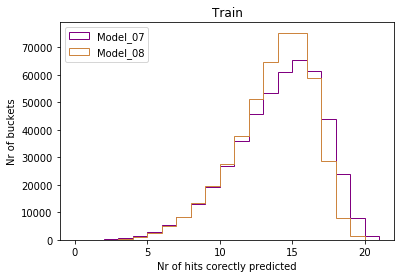

In [80]:
list_tupleArray=[]
#list_tupleArray.append((nparray_counterLine_01_Train,"Model_01","blue"))
#list_tupleArray.append((nparray_counterLine_02_Train,"Model_02","red"))
#list_tupleArray.append((nparray_counterLine_03_Train,"Model_03","green"))
#list_tupleArray.append((nparray_counterLine_04_Train,"Model_04","magenta"))
#list_tupleArray.append((nparray_counterLine_05_Train,"Model_05","black"))
#list_tupleArray.append((nparray_counterLine_06_Train,"Model_06","aqua"))
list_tupleArray.append((nparray_counterLine_07_Train,"Model_07","purple"))
list_tupleArray.append((nparray_counterLine_08_Train,"Model_08","peru"))
plot_overlay_hist(
        list_tupleArray,
        x_info=["Nr of hits corectly predicted",(-1,-1)],
        y_info=["Nr of buckets",(-1,-1)],
        title_info=["Train"],
        legend_info=["upper left"],
        debug=False
    )

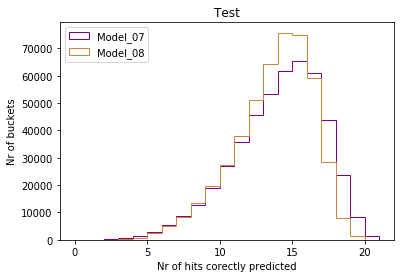

In [87]:
list_tupleArray=[]
#list_tupleArray.append((nparray_counterLine_01_Test,"Model_01","blue"))
#list_tupleArray.append((nparray_counterLine_02_Test,"Model_02","red"))
#list_tupleArray.append((nparray_counterLine_03_Test,"Model_03","green"))
#list_tupleArray.append((nparray_counterLine_04_Test,"Model_04","magenta"))
#list_tupleArray.append((nparray_counterLine_05_Test,"Model_05","black"))
#list_tupleArray.append((nparray_counterLine_06_Test,"Model_06","aqua"))
list_tupleArray.append((nparray_counterLine_07_Test,"Model_07","purple"))
list_tupleArray.append((nparray_counterLine_08_Test,"Model_08","peru"))
plot_overlay_hist(
        list_tupleArray,
        x_info=["Nr of hits corectly predicted",(-1,-1)],
        y_info=["Nr of buckets",(-1,-1)],
        title_info=["Test"],
        legend_info=["upper left"],
        debug=False
    )

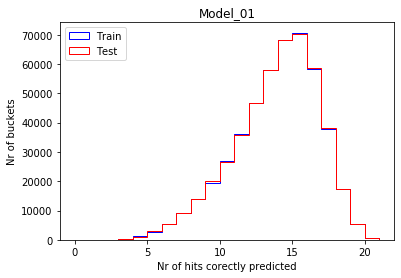

In [46]:
list_tupleArray=[]
list_tupleArray.append((nparray_counterLine_01_Train,"Train","blue"))
list_tupleArray.append((nparray_counterLine_01_Test,"Test","red"))
plot_overlay_hist(
        list_tupleArray,
        x_info=["Nr of hits corectly predicted",(-1,-1)],
        y_info=["Nr of buckets",(-1,-1)],
        title_info=["Model_01"],
        legend_info=["upper left"],
        debug=False
    )

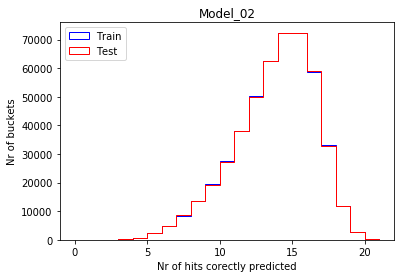

In [47]:
list_tupleArray=[]
list_tupleArray.append((nparray_counterLine_02_Train,"Train","blue"))
list_tupleArray.append((nparray_counterLine_02_Test,"Test","red"))
plot_overlay_hist(
        list_tupleArray,
        x_info=["Nr of hits corectly predicted",(-1,-1)],
        y_info=["Nr of buckets",(-1,-1)],
        title_info=["Model_02"],
        legend_info=["upper left"],
        debug=False
    )

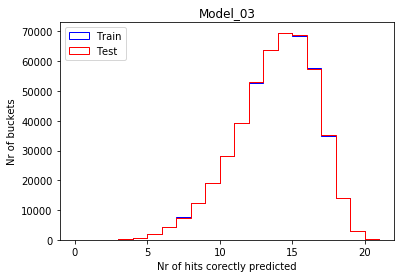

In [48]:
list_tupleArray=[]
list_tupleArray.append((nparray_counterLine_03_Train,"Train","blue"))
list_tupleArray.append((nparray_counterLine_03_Test,"Test","red"))
plot_overlay_hist(
        list_tupleArray,
        x_info=["Nr of hits corectly predicted",(-1,-1)],
        y_info=["Nr of buckets",(-1,-1)],
        title_info=["Model_03"],
        legend_info=["upper left"],
        debug=False
    )

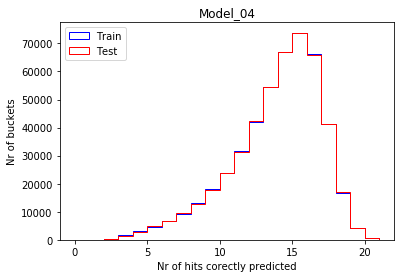

In [49]:
list_tupleArray=[]
list_tupleArray.append((nparray_counterLine_04_Train,"Train","blue"))
list_tupleArray.append((nparray_counterLine_04_Test,"Test","red"))
plot_overlay_hist(
        list_tupleArray,
        x_info=["Nr of hits corectly predicted",(-1,-1)],
        y_info=["Nr of buckets",(-1,-1)],
        title_info=["Model_04"],
        legend_info=["upper left"],
        debug=False
    )

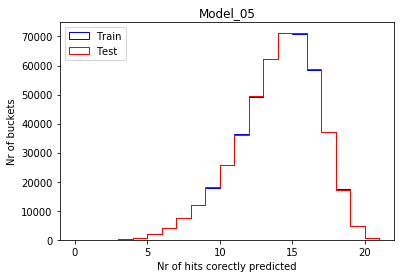

In [50]:
list_tupleArray=[]
list_tupleArray.append((nparray_counterLine_05_Train,"Train","blue"))
list_tupleArray.append((nparray_counterLine_05_Test,"Test","red"))
plot_overlay_hist(
        list_tupleArray,
        x_info=["Nr of hits corectly predicted",(-1,-1)],
        y_info=["Nr of buckets",(-1,-1)],
        title_info=["Model_05"],
        legend_info=["upper left"],
        debug=False
    )

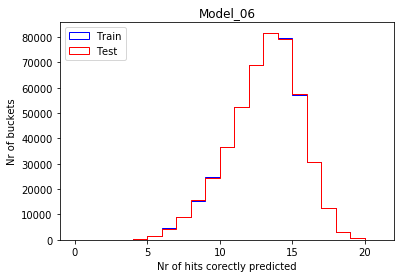

In [51]:
list_tupleArray=[]
list_tupleArray.append((nparray_counterLine_06_Train,"Train","blue"))
list_tupleArray.append((nparray_counterLine_06_Test,"Test","red"))
plot_overlay_hist(
        list_tupleArray,
        x_info=["Nr of hits corectly predicted",(-1,-1)],
        y_info=["Nr of buckets",(-1,-1)],
        title_info=["Model_06"],
        legend_info=["upper left"],
        debug=False
    )

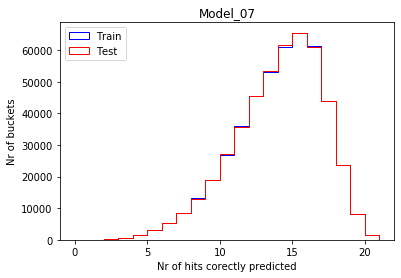

In [52]:
list_tupleArray=[]
list_tupleArray.append((nparray_counterLine_07_Train,"Train","blue"))
list_tupleArray.append((nparray_counterLine_07_Test,"Test","red"))
plot_overlay_hist(
        list_tupleArray,
        x_info=["Nr of hits corectly predicted",(-1,-1)],
        y_info=["Nr of buckets",(-1,-1)],
        title_info=["Model_07"],
        legend_info=["upper left"],
        debug=False
    )

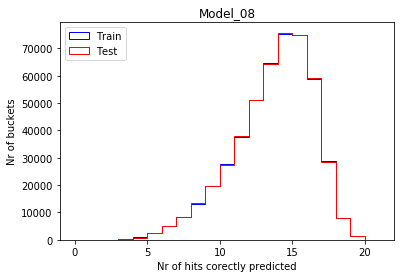

In [53]:
list_tupleArray=[]
list_tupleArray.append((nparray_counterLine_08_Train,"Train","blue"))
list_tupleArray.append((nparray_counterLine_08_Test,"Test","red"))
plot_overlay_hist(
        list_tupleArray,
        x_info=["Nr of hits corectly predicted",(-1,-1)],
        y_info=["Nr of buckets",(-1,-1)],
        title_info=["Model_08"],
        legend_info=["upper left"],
        debug=False
    )

list_modelName ['Model_01', 'Model_02', 'Model_03', 'Model_04', 'Model_05', 'Model_06', 'Model_07', 'Model_08']
modelName Model_01


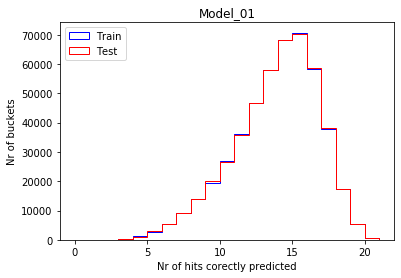

modelName Model_02


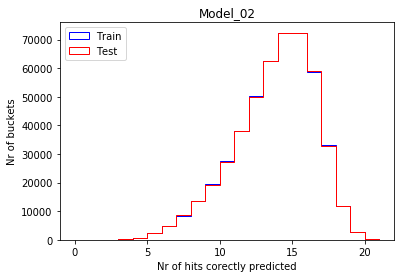

modelName Model_03


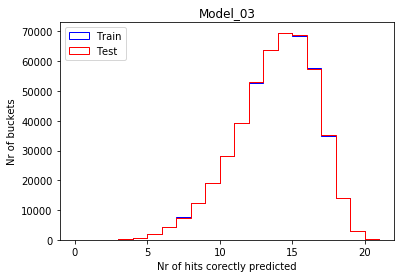

modelName Model_04


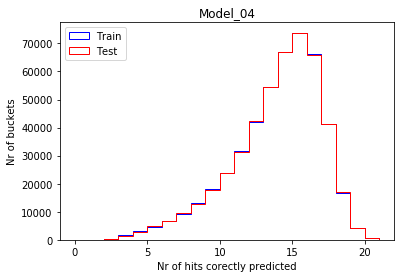

modelName Model_05


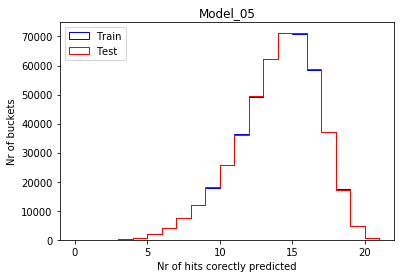

modelName Model_06


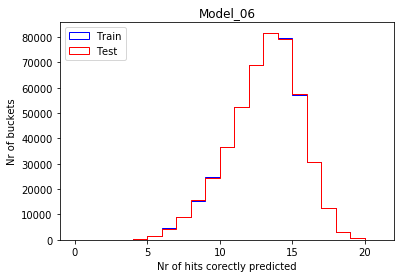

modelName Model_07


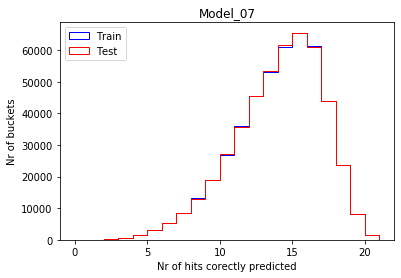

modelName Model_08


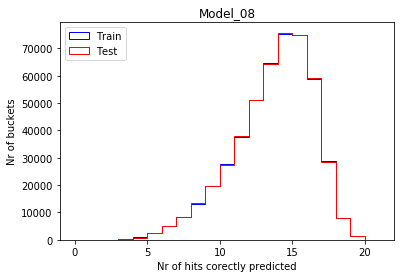

In [54]:
list_modelName=["Model_01","Model_02","Model_03","Model_04","Model_05","Model_06","Model_07","Model_08"]
print("list_modelName",list_modelName)
for modelName in list_modelName:
    print("modelName",modelName)
    list_tupleArray=[]
    if modelName=="Model_01":
        list_tupleArray.append((nparray_counterLine_01_Train,"Train","blue"))
        list_tupleArray.append((nparray_counterLine_01_Test,"Test","red"))
    elif modelName=="Model_02":
        list_tupleArray.append((nparray_counterLine_02_Train,"Train","blue"))
        list_tupleArray.append((nparray_counterLine_02_Test,"Test","red"))
    elif modelName=="Model_03":
        list_tupleArray.append((nparray_counterLine_03_Train,"Train","blue"))
        list_tupleArray.append((nparray_counterLine_03_Test,"Test","red"))
    elif modelName=="Model_04":
        list_tupleArray.append((nparray_counterLine_04_Train,"Train","blue"))
        list_tupleArray.append((nparray_counterLine_04_Test,"Test","red"))
    elif modelName=="Model_05":
        list_tupleArray.append((nparray_counterLine_05_Train,"Train","blue"))
        list_tupleArray.append((nparray_counterLine_05_Test,"Test","red"))
    elif modelName=="Model_06":
        list_tupleArray.append((nparray_counterLine_06_Train,"Train","blue"))
        list_tupleArray.append((nparray_counterLine_06_Test,"Test","red"))
    elif modelName=="Model_07":
        list_tupleArray.append((nparray_counterLine_07_Train,"Train","blue"))
        list_tupleArray.append((nparray_counterLine_07_Test,"Test","red"))
    elif modelName=="Model_08":
        list_tupleArray.append((nparray_counterLine_08_Train,"Train","blue"))
        list_tupleArray.append((nparray_counterLine_08_Test,"Test","red"))
    else:
        print("modelName",modelName,"not known. Choose Model_01 through Model_08. Will do nothing!")
    # done if
    plot_overlay_hist(
            list_tupleArray,
            x_info=["Nr of hits corectly predicted",(-1,-1)],
            y_info=["Nr of buckets",(-1,-1)],
            title_info=[modelName],
            legend_info=["upper left"],
            debug=False
        )
# done for loop over modelName

list_modelName ['Model_01', 'Model_02', 'Model_03', 'Model_04', 'Model_05', 'Model_06', 'Model_07', 'Model_08']
modelName Model_01


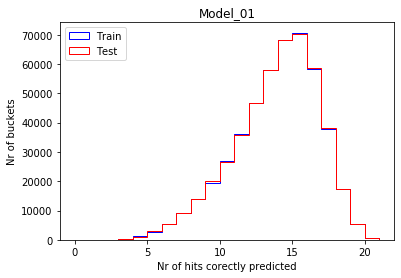

modelName Model_02


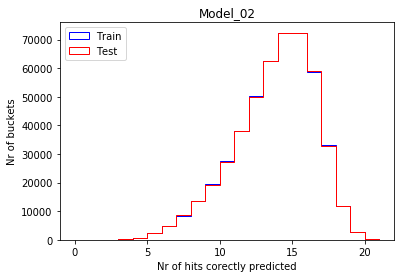

modelName Model_03


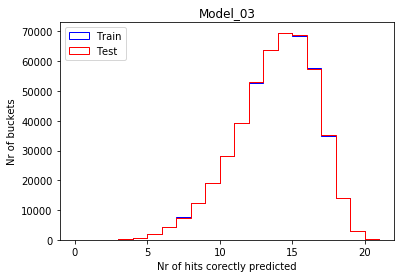

modelName Model_04


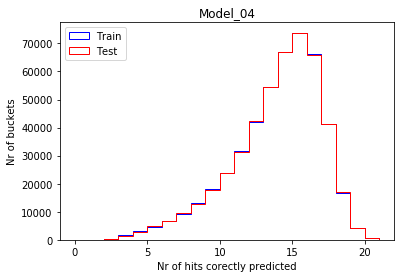

modelName Model_05


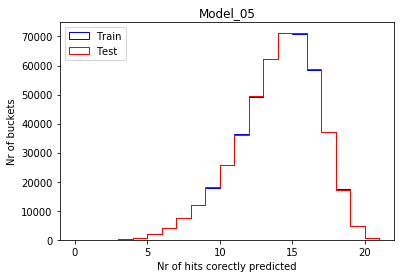

modelName Model_06


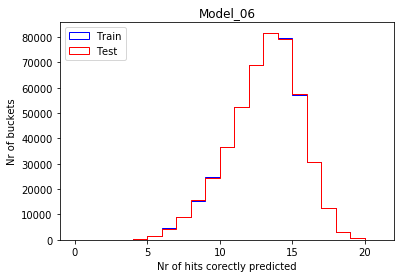

modelName Model_07


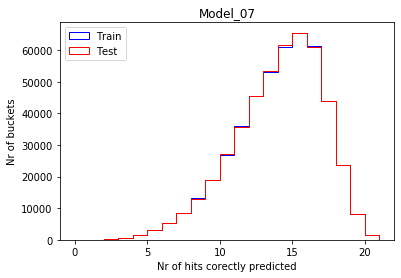

modelName Model_08


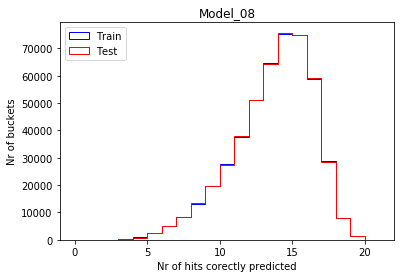

In [55]:
dict_name_nparray={}
dict_name_nparray["Model_01_Train"]=nparray_counterLine_01_Train
dict_name_nparray["Model_01_Test"]=nparray_counterLine_01_Test
dict_name_nparray["Model_02_Train"]=nparray_counterLine_02_Train
dict_name_nparray["Model_02_Test"]=nparray_counterLine_02_Test
dict_name_nparray["Model_03_Train"]=nparray_counterLine_03_Train
dict_name_nparray["Model_03_Test"]=nparray_counterLine_03_Test
dict_name_nparray["Model_04_Train"]=nparray_counterLine_04_Train
dict_name_nparray["Model_04_Test"]=nparray_counterLine_04_Test
dict_name_nparray["Model_05_Train"]=nparray_counterLine_05_Train
dict_name_nparray["Model_05_Test"]=nparray_counterLine_05_Test
dict_name_nparray["Model_06_Train"]=nparray_counterLine_06_Train
dict_name_nparray["Model_06_Test"]=nparray_counterLine_06_Test
dict_name_nparray["Model_07_Train"]=nparray_counterLine_07_Train
dict_name_nparray["Model_07_Test"]=nparray_counterLine_07_Test
dict_name_nparray["Model_08_Train"]=nparray_counterLine_08_Train
dict_name_nparray["Model_08_Test"]=nparray_counterLine_08_Test


list_modelName=["Model_01","Model_02","Model_03","Model_04","Model_05","Model_06","Model_07","Model_08"]
print("list_modelName",list_modelName)
for modelName in list_modelName:
    print("modelName",modelName)
    list_tupleArray=[]
    list_tupleArray.append((dict_name_nparray[modelName+"_"+"Train"],"Train","blue"))
    list_tupleArray.append((dict_name_nparray[modelName+"_"+"Test"],"Test","red"))
    plot_overlay_hist(
            list_tupleArray,
            x_info=["Nr of hits corectly predicted",(-1,-1)],
            y_info=["Nr of buckets",(-1,-1)],
            title_info=[modelName],
            legend_info=["upper left"],
            debug=False
        )
# done for loop over modelName

list_modelName ['Model_01', 'Model_02', 'Model_03', 'Model_04', 'Model_05', 'Model_06', 'Model_07', 'Model_08']
modelName Model_01


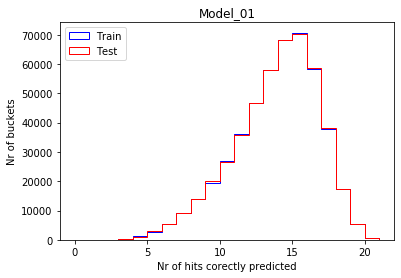

modelName Model_02


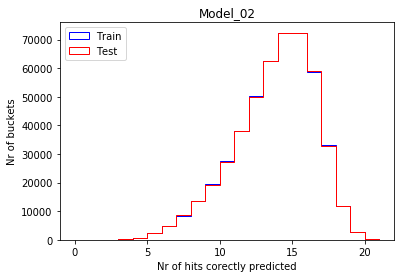

modelName Model_03


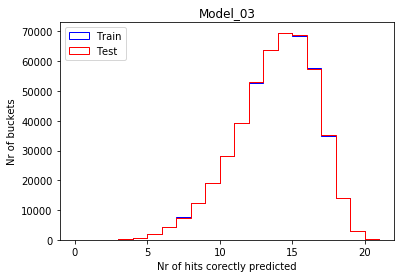

modelName Model_04


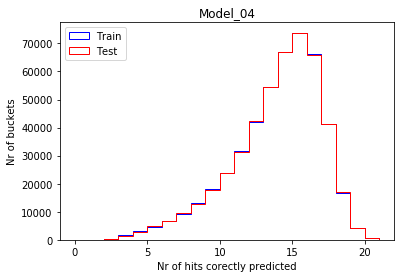

modelName Model_05


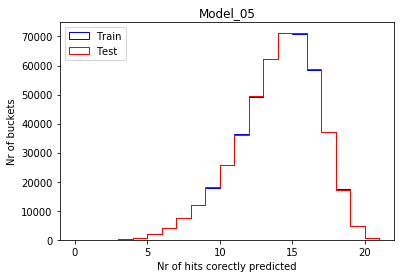

modelName Model_06


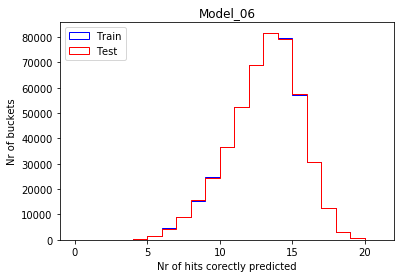

modelName Model_07


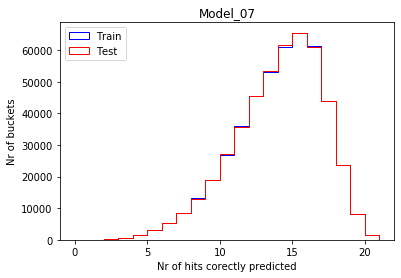

modelName Model_08


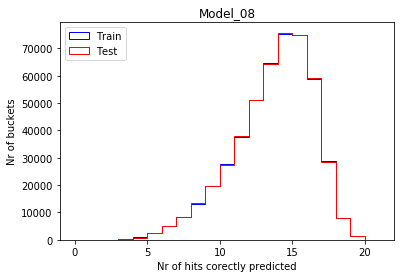

In [56]:
dict_name_nparray={}
dict_name_nparray["Model_01_Train"]=nparray_counterLine_01_Train
dict_name_nparray["Model_01_Test"]=nparray_counterLine_01_Test
dict_name_nparray["Model_02_Train"]=nparray_counterLine_02_Train
dict_name_nparray["Model_02_Test"]=nparray_counterLine_02_Test
dict_name_nparray["Model_03_Train"]=nparray_counterLine_03_Train
dict_name_nparray["Model_03_Test"]=nparray_counterLine_03_Test
dict_name_nparray["Model_04_Train"]=nparray_counterLine_04_Train
dict_name_nparray["Model_04_Test"]=nparray_counterLine_04_Test
dict_name_nparray["Model_05_Train"]=nparray_counterLine_05_Train
dict_name_nparray["Model_05_Test"]=nparray_counterLine_05_Test
dict_name_nparray["Model_06_Train"]=nparray_counterLine_06_Train
dict_name_nparray["Model_06_Test"]=nparray_counterLine_06_Test
dict_name_nparray["Model_07_Train"]=nparray_counterLine_07_Train
dict_name_nparray["Model_07_Test"]=nparray_counterLine_07_Test
dict_name_nparray["Model_08_Train"]=nparray_counterLine_08_Train
dict_name_nparray["Model_08_Test"]=nparray_counterLine_08_Test

list_TrainOrTest=["Train","Test"]
dict_TrainOrTest_color={
    "Train":"blue",
    "Test":"red",
}

list_modelName=["Model_01","Model_02","Model_03","Model_04","Model_05","Model_06","Model_07","Model_08"]
print("list_modelName",list_modelName)
for modelName in list_modelName:
    print("modelName",modelName)
    list_tupleArray=[]
    for TrainOrTest in list_TrainOrTest:
        list_tupleArray.append((dict_name_nparray[modelName+"_"+TrainOrTest],
                                TrainOrTest,
                                dict_TrainOrTest_color[TrainOrTest]))
    # done for loop over TrainOrTest
    plot_overlay_hist(
            list_tupleArray,
            x_info=["Nr of hits corectly predicted",(-1,-1)],
            y_info=["Nr of buckets",(-1,-1)],
            title_info=[modelName],
            legend_info=["upper left"],
            debug=False
        )
# done for loop over modelName